## Explorations on Gradient Descent Visualization

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Setting standard style
plt.style.use('bmh')

### Getting the data

In [6]:
%%writefile data/data.csv
X1,X2,Target
-2, 3, +1
-1, -1, -1
2, -3,  +1


Writing data/data.csv


In [5]:
df = pd.read_csv('data/data.csv')
df

,X1,X2,Target
0,-2,3,1
1,-1,-1,-1
2,2,-3,1


### Testing Geometry...

In [270]:
def plot_int(slope, offset, x_, y_):
    X = np.arange(-4, 5)
    
    ## FIGURE
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    
    # Plot separation line
    ax.plot(X, [slope*x + offset for x in X] , color='k')
    ax.plot(X, [-1.*x/slope + y_ + x_/slope for x in X], color='blue', alpha=.7)
    ax.scatter([x_], [y_])
    
    # Plot intersection
    int_x = (y_ + x_/slope - offset) / (slope + 1./slope)
    int_y = slope * int_x + offset
    int_yS = -1/slope * int_x + y_ + x_/slope
    print(int_y, ' == ', int_yS)
    
    ax.scatter([int_x],[int_y], color='orange', s=200)
    
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    

1.4117647058823533  ==  1.411764705882352


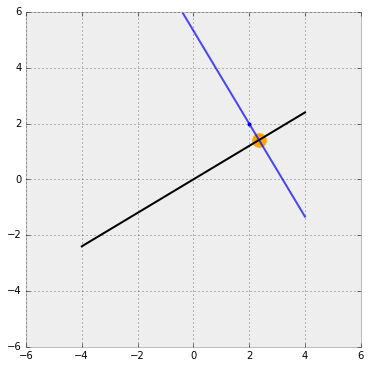

In [276]:
plot_int(.6,0, 2, 2)

### Calculate Margin

In [9]:
def intersection_line_point(slope, offset, x_, y_):
    # intersection point
    int_x = (y_ + x_/slope - offset) / (slope + 1./slope)
    int_y = slope * int_x + offset
    
    return (int_x, int_y)


def dist_line2point(slope, offset, x_, y_):
    # obtain intersection point
    int_x, int_y = intersection_line_point(slope, offset, x_, y_)
    
    return( np.hypot(abs(int_x - x_), abs(int_y - y_)) )


def get_margin(slope, offset):
    # get distance from all points to line
    margins = []
    for i, x in df.iterrows():
        margins.append( dist_line2point(slope, offset, x.X1, x.X2) )
    
    # find point with smallest distance to line
    p_margin = np.argmin(margins)
    
    # output distance and point coordinates
    return (margins[p_margin], (df.loc[p_margin].X1, df.loc[p_margin].X2) )
    

In [18]:
intersection_line_point(-2, -1.5, -1, -1)

(-0.4, -0.7)

In [213]:
x = get_margin(-2, -3./2)
int_p = intersection_line_point(-2, -3./2, *x[1])
int_p

[9.841239759298622, 1.9104973174542799, 4.6097722286464435]


(0.40000000000000002, -2.2999999999999998)

### 2D Plot: Data & Separation Hyperplane

In [6]:
# Line factory
def line_factory(slope, offset):
    return np.vectorize(lambda x: slope * x + offset )


In [27]:
X = np.arange(-4,4, 1)

linePP = line_factory(-3./2, 0)
linePP_y = linePP(X)

linePPp = line_factory(-3./2, -5./2)
linePPp_y = linePPp(X)

lineNP = line_factory(-2./3, -5./3)
lineNP_y = lineNP(X)

linePN = line_factory(-4., -5.)
linePN_y = linePN(X)


def plot_sep_line(slope, offset):
    
    # separation lines
    line = line_factory(slope, offset)
    line_y = line(X)
    
    # get margin
    margin, marg_p = get_margin(slope, offset)
    int_p = intersection_line_point(slope, offset, *marg_p)
    
    ## FIGURE
    fig, ax = plt.subplots(1,1, figsize=(6,6))

    # Plot data points
    ax.scatter(df.X1.loc[df.Target > 0], df.X2.loc[df.Target > 0], marker='+', lw=3, s=300, color='green')  # plot +1's
    ax.scatter(df.X1.loc[df.Target < 0], df.X2.loc[df.Target < 0], marker='x', lw=3, s=300, color='red')  # plot -1's

    # Plot solution space
    ax.fill_between(X, linePP_y, linePPp_y, where=linePP_y >= linePPp_y, facecolor='b', alpha=.1, interpolate=True)
    ax.fill_between(X, linePPp_y, lineNP_y, where=linePPp_y >= lineNP_y, facecolor='b', alpha=.1, interpolate=True)
    ax.fill_between(X, linePPp_y, linePN_y, where=linePPp_y >= linePN_y, facecolor='b', alpha=.1, interpolate=True)

    # Plot separation line
    ax.plot(X, line_y, color='darkblue', ls='--', alpha=.7)
    
    # Plot margin
    ax.plot([int_p[0], marg_p[0]], [int_p[1], marg_p[1]], color='cyan', lw=4)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    fig.suptitle('Intuitive Solution Space - Margin: {:.2f}'.format(margin), size=18)

    plt.show()

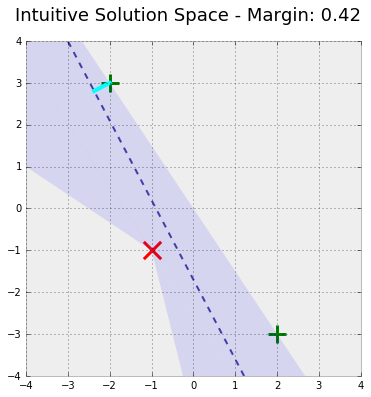

In [11]:
plot_sep_line(-1.9, -1.7)

### 2-d Widget

In [79]:
from ipywidgets import widgets
from IPython.display import display, clear_output


In [299]:
dashboard = widgets.VBox()

# Title and spacers
header = widgets.HTML("<h3 style='color: darkblue; width: 900px; text-align: center;'>Separation Hyperplane</h3>")
vspace = widgets.HTML("<br>")
hspace = widgets.HTML("<h2 style='color: white;'>--</h2>")

# Style selection
slope_slider = widgets.FloatSlider(
    value=-2,
    min=-5,
    max=0,
    step=0.1,
    description='Slope:',
    slider_color='blue'
)

offset_slider = widgets.FloatSlider(
    value=-3./2,
    min=-2.5,
    max=2.5,
    step=0.1,
    description='Offset:',
    slider_color='blue'
)

plot_button = widgets.Button(description="PLOT + Get Margin",)

# Final Layout
left_panel = widgets.VBox(children=[slope_slider, vspace, offset_slider]) 
right_panel = widgets.VBox(children=[vspace, plot_button]) 


body_panel = widgets.HBox(children=[left_panel, hspace, hspace, hspace, right_panel])

dashboard.children = [header, vspace, body_panel]

In [300]:
def plot_on_demand(_):
    clear_output()
    plot_sep_line(slope_slider.value, offset_slider.value)

In [301]:
plot_button.on_click(plot_on_demand)

[0.55891365451005204, 0.25796014823540864, 1.5907542474516869]


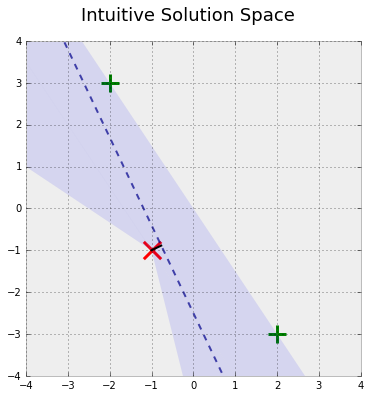

In [302]:
dashboard

### 3D Plot: Loss function and gradient descent iterations

In [16]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
 
import numpy as np

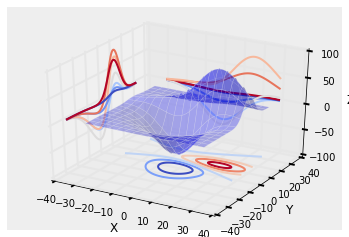

In [17]:
map(lambda x: x.shape, axes3d.get_test_data(0.05))
 
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
 
ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)
 
plt.show()

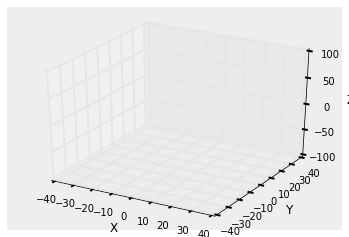

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

X = np.tile(np.arange(-4,4.1,.1), (80,1))
Y = np.tile(np.arange(-4,4.1,.1), (80,1))
Z = np.sin(-X*Y)

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
 
ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)
 
plt.show()

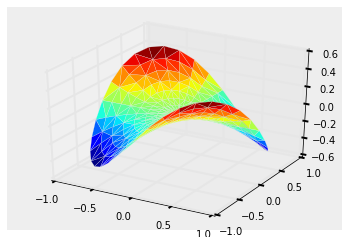

In [19]:
n_angles = 36
n_radii = 8
 
# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)
 
# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
 
# Repeat all angles for each radius
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
 
# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
 
# Pringle surface
z = np.sin(-x*y)
 
fig = plt.figure()
ax = fig.gca(projection='3d')
 
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)
 
plt.show()

### Loss functions

In [20]:
def zero_one_loss(slope, offset):
    prediction = np.sign( df.X2 - (slope * df.X1 + offset) )
    return (prediction != df.Target).any() * 1


In [21]:
zero_one_loss(-1.5, -1.4)

0

In [22]:
def hinge_loss(slope, offset, regularization=.2):
    error = np.maximum(0, 1. - df.X2 * (slope * df.X1 + offset) )
    return error.sum()

In [23]:
hinge_loss(-1.5, -1.4)

1.1000000000000001

In [24]:
def log_loss(slope, offset, regularization=.2):
    _p = 1 / (1 + np.exp(-1 * slope * df.X1 + offset))
    error = df.X2 * np.log(_p) + (1 - df.X2) * np.log(1 - _p)
    return error.sum() * -1 / error.count()

In [25]:
log_loss(-1.5, -1.4)

-2.5167779660953298

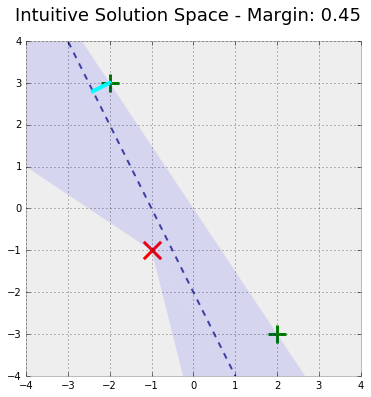

--> Error (Zero-One): 0
--> Error (Hinge Loss): 1.0
--> Error (Log Loss): -3.284148791967194


In [28]:
SLOPE , OFFSET = -2. , -2.
plot_sep_line(SLOPE , OFFSET)
print('--> Error (Zero-One): {}'.format(zero_one_loss(SLOPE , OFFSET)) )
print('--> Error (Hinge Loss): {}'.format(hinge_loss(SLOPE , OFFSET)) )
print('--> Error (Log Loss): {}'.format(log_loss(SLOPE , OFFSET)) )


### 3D Loss Surface

In [29]:
x_3d = axes3d.get_test_data(0.05)[0]/10
y_3d = axes3d.get_test_data(0.05)[1]/10

z_zero = np.vectorize(zero_one_loss)(x_3d, y_3d)
z_hinge = np.vectorize(hinge_loss)(x_3d, y_3d)
z_log = np.vectorize(log_loss)(x_3d, y_3d)

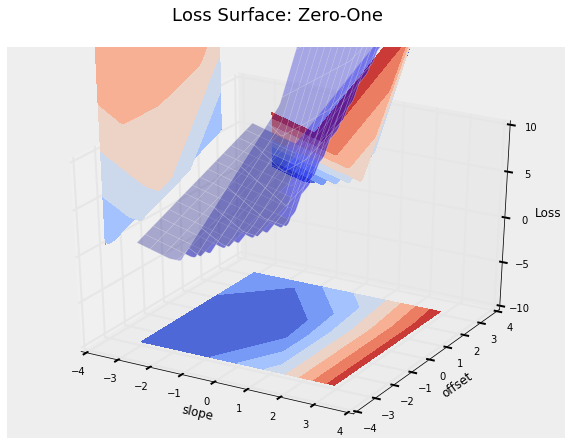

In [33]:
Z = z_hinge

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.plot_surface(x_3d, y_3d, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(x_3d, y_3d, Z, zdir='z', offset=-10, cmap=cm.coolwarm)
cset = ax.contourf(x_3d, y_3d, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contourf(x_3d, y_3d, Z, zdir='y', offset=4, cmap=cm.coolwarm)
 
ax.set_xlabel('slope')
ax.set_xlim(-4, 4)
ax.set_ylabel('offset')
ax.set_ylim(-4, 4)
ax.set_zlabel('Loss')
ax.set_zlim(-10, 10)

fig.suptitle('Loss Surface: {fun}'.format(fun='Zero-One'), size=18)
 
plt.show()

In [34]:
def plot_sep_line(slope, offset):
    
    # separation lines
    line = line_factory(slope, offset)
    line_y = line(X)
    
    # get margin
    margin, marg_p = get_margin(slope, offset)
    int_p = intersection_line_point(slope, offset, *marg_p)
    
    ## FIGURE
    fig = plt.figure(figsize=(17,10))

    # fig, ax = plt.subplots(1, 2, figsize=(17,7))

    ## 2D Plot
    # Plot data points
    ax_0 = fig.add_subplot(2, 2, 1)

    ax_0.scatter(df.X1.loc[df.Target > 0], df.X2.loc[df.Target > 0], marker='+', lw=3, s=300, color='green')  # plot +1's
    ax_0.scatter(df.X1.loc[df.Target < 0], df.X2.loc[df.Target < 0], marker='x', lw=3, s=300, color='red')  # plot -1's

    # Plot solution space
    ax_0.fill_between(X, linePP_y, linePPp_y, where=linePP_y >= linePPp_y, facecolor='b', alpha=.1, interpolate=True)
    ax_0.fill_between(X, linePPp_y, lineNP_y, where=linePPp_y >= lineNP_y, facecolor='b', alpha=.1, interpolate=True)
    ax_0.fill_between(X, linePPp_y, linePN_y, where=linePPp_y >= linePN_y, facecolor='b', alpha=.1, interpolate=True)

    # Plot separation line
    ax_0.plot(X, line_y, color='darkblue', ls='--', alpha=.7)
    
    # Plot margin
    ax_0.plot([int_p[0], marg_p[0]], [int_p[1], marg_p[1]], color='cyan', lw=4)

    ax_0.set_xlim(-4, 4)
    ax_0.set_ylim(-4, 4)
    ax_0.set_title('Solution Space - Margin: {:.2f}'.format(margin), size=18)


    ## 3D Plot
    ax_1 = fig.add_subplot(2, 2, 2, projection='3d')
    ax_1 = fig.gca(projection='3d')

    cset = ax_1.contourf(x_3d, y_3d, Z, zdir='z', offset=-10, cmap=cm.coolwarm)
    cset = ax_1.contourf(x_3d, y_3d, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
    cset = ax_1.contourf(x_3d, y_3d, Z, zdir='y', offset=4, cmap=cm.coolwarm)
    ax_1.plot_surface(x_3d, y_3d, Z, rstride=8, cstride=8, alpha=0.3)

    # add actual line to 3D plot
    ax_1.scatter([slope], [offset], marker='o', s=30, c='k')
    
    ax_1.set_xlabel('slope')
    ax_1.set_xlim(-4, 4)
    ax_1.set_ylabel('offset')
    ax_1.set_ylim(-4, 4)
    ax_1.set_zlabel('Loss')
#     ax_1.set_zlim(-10, 10)

    ax_1.set_title('Loss Surface: {fun}'.format(fun='Zero-One'), size=18)
    
    plt.tight_layout()
    plt.show()


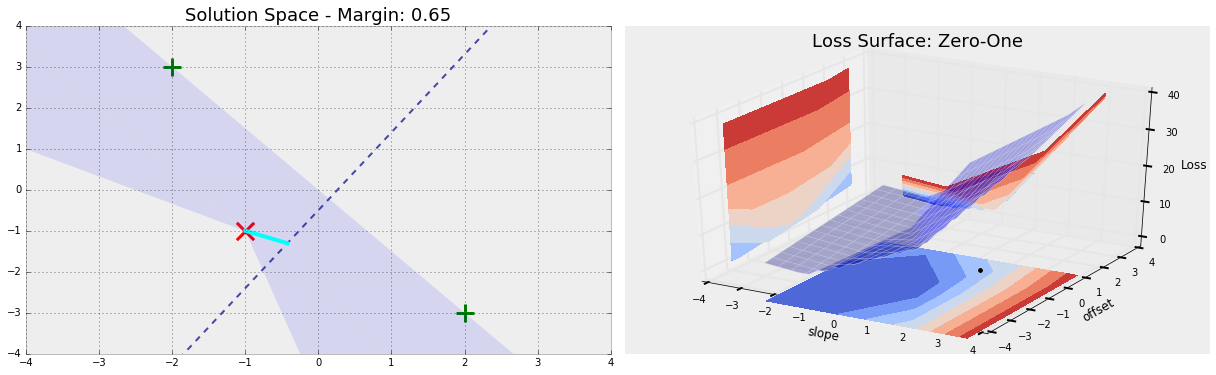

In [40]:
plot_sep_line(1.9, -.5)

### Gradient Descent

0:  1.0 -1
-2 3
1:  -2.0 0.5


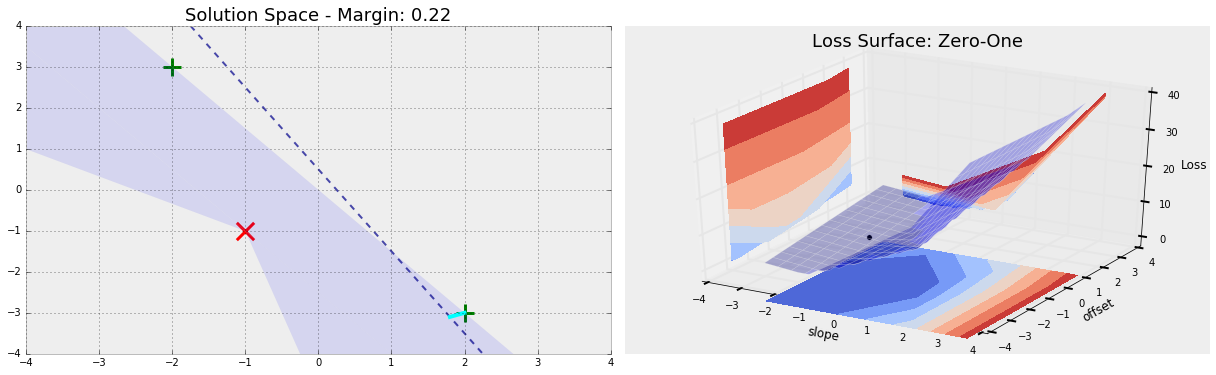

-1 -1
2:  -1.5 0.0


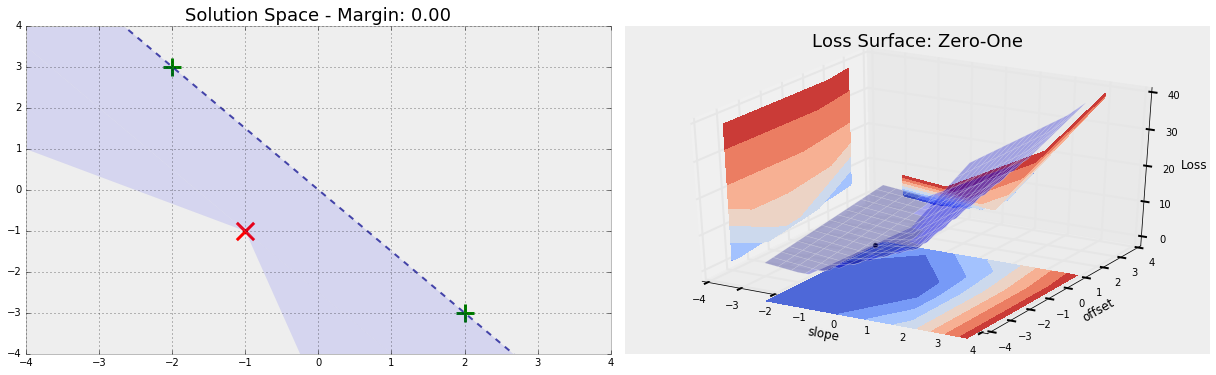

2 -3
3:  -4.5 -1.5


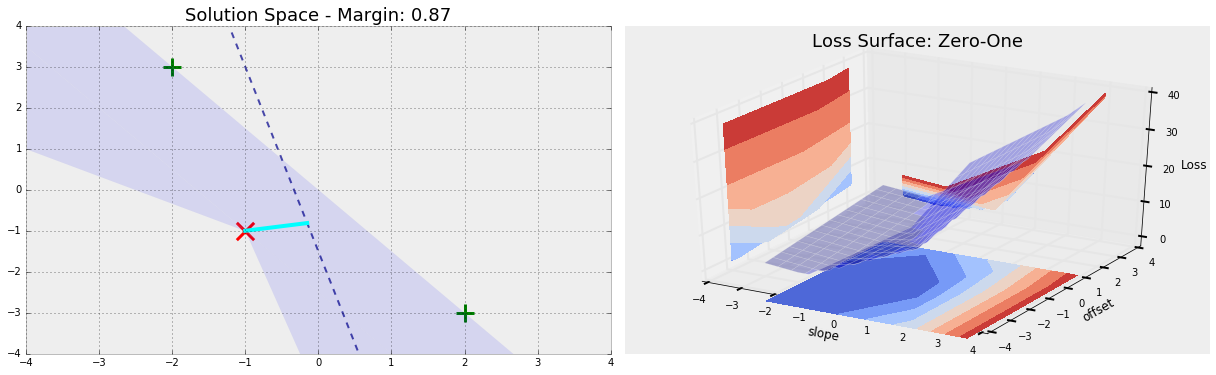

In [59]:
LEARN_RATE = .5

slope = 1.
offset = -1

print('0: ', slope, offset)

for i,x in df.iterrows():
    print(x.X1, x.X2)
    slope -= LEARN_RATE * (-1 * x.X2 * x.X1)
    offset -= LEARN_RATE * (-1 * x.X2)
    
    print('{}: '.format(i+1), slope, offset)
    plot_sep_line(slope, offset)



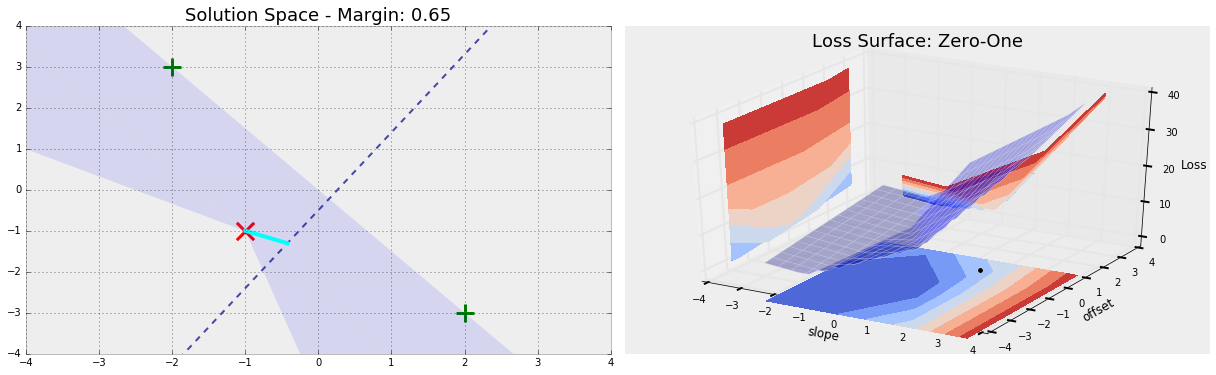

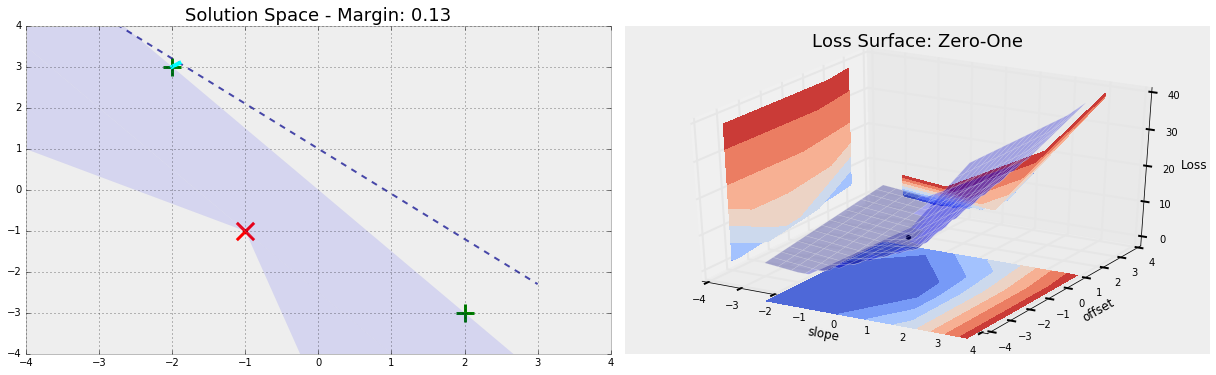

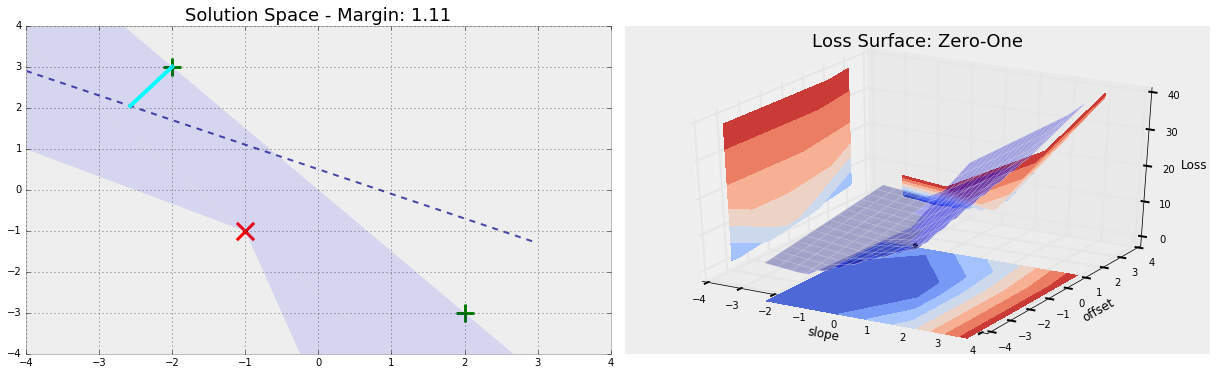

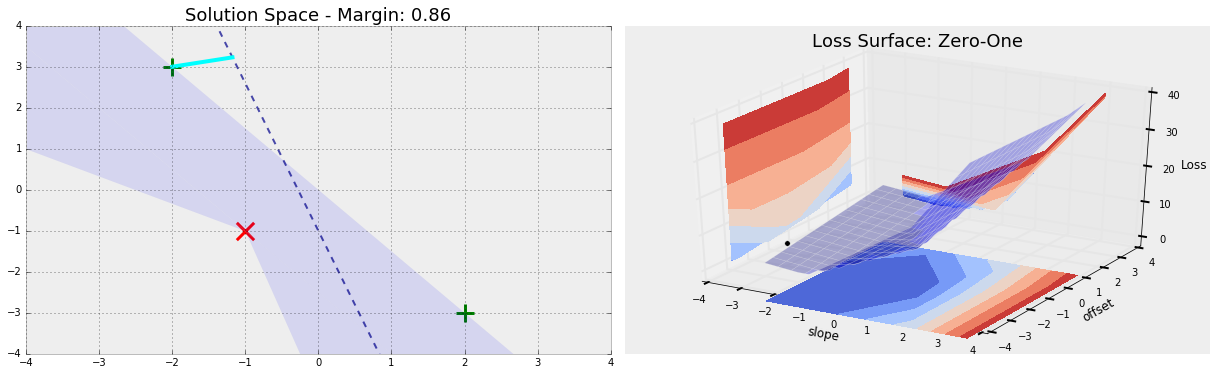

In [54]:
plot_sep_line(1.9, -.5)

# Update from 0 to 1 (using -2,3)  [All with LEARN RATE = .5]
# OFFSET: -.5 --> -.5 - .5 * (-1 * 3) = 1.5
# SLOPE: 1.9 --> 1.9 - .5 * (-1 * 3 * -2) = -1.1
plot_sep_line(-1.1, 1.0)

# Update 1 to 2 (using -1, -1)
# OFFSET: 1.5 --> 1.5 - .5 * (-1 * -1) = 1.0
# SLOPE: -1.1 --> -1.1 - .5 * (-1 * -1 * -1) = -0.6
plot_sep_line(-0.6, 0.5)

# Update 2 to 3 (using 2, -3)
# OFFSET: 1.5 --> 1.5 - .5 * (-1 * -3) = 0
# SLOPE: -1.1 --> -1.1 - .5 * (-1 * -3 * 2) = -1.6
plot_sep_line(-3.6, -1.0)